In [18]:
import numpy as np
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from numpy import mean
from numpy import std
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directoryimport matplotlib.pyplot as plt
import seaborn as sns

In [19]:
def polyFit(df):
    polynomial = 5
    gradient = 0.05
    df
    return df

In [20]:
def crop_range_to_numpy(df):
    
    # Dropping columns : ['patientID', 'has_DM2']
    df_dropped_index = df.drop(labels=['patientID', 'has_DM2'], axis=1, inplace=False)
    
    # Cropping raman shift from range 800 cm-1 to 1800cm-1
    cropped_signal = df_dropped_index.loc[:, 'Var802':'Var1801']
    
    # Convert data to numpy.ndarray
    cropped_signal_np = cropped_signal.to_numpy()
    
    # Dropping the first index corresponding to label : ramanShift
    cropped_signal_np = cropped_signal_np[1:]
    
    return cropped_signal_np

In [21]:
df_matlab = pd.read_csv('../../raman_spectroscopy/matlab_raman_preprocessed/earData.csv', header=None)

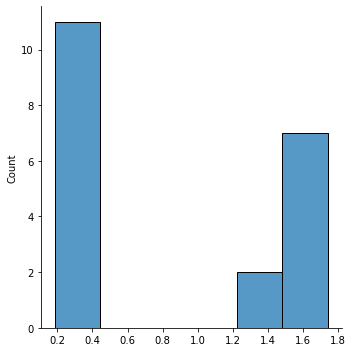

In [22]:
sns.displot(df_matlab.T.mean())

In [23]:
df_original = pd.read_csv('../../raman_spectroscopy/original_raman_spectroscopy/earLobe.csv', header=1)
df_original.drop(['ramanShift', 'NaN'], axis=1, inplace=True)

In [24]:
df_original.T.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000
mean,105.641500,102.339941,68.113510,156.319174,34.881108,37.475585,88.425244,55.134790,89.535158,102.534969,68.512924,74.374071,76.111938,58.106650,56.374502,24.433549,34.865911,45.137567,135.027490,145.831030
std,102.780668,89.909083,60.414467,150.927265,39.611250,69.879225,88.215717,58.561479,84.393744,69.300341,60.662185,69.282883,69.991832,55.473273,53.210516,52.394446,45.126124,47.409288,126.916097,137.367473
min,-361.333688,-13.528140,-42.764477,-1.504922,-979.570520,-1869.244141,-422.319101,-1505.030233,-445.873965,-172.941493,-394.009706,-115.683733,-21.469641,-466.556958,-64.844357,-1182.540751,-440.403057,-777.069813,-279.704678,-191.763529
25%,14.804432,21.875421,13.854578,23.048497,5.282268,-8.790049,13.637620,12.984698,19.205878,49.461673,12.865624,14.559691,16.907332,13.483563,12.569287,-10.943143,9.255978,11.293716,19.172933,23.637968
50%,76.844236,79.439917,52.832290,96.305283,25.236478,20.846679,58.784292,47.066261,71.085363,84.316749,57.038819,54.025182,56.180118,42.007166,41.095030,13.773633,26.982528,33.592353,92.010808,95.715443
75%,181.800000,162.800000,107.400000,290.166667,53.224883,64.659046,147.800000,87.177016,139.751969,138.009402,105.800000,116.000000,115.600000,86.813134,83.513714,47.394413,53.683348,65.128337,228.666667,256.600000
max,1754.564941,672.493872,370.202655,1017.445028,217.940457,384.166065,1359.114990,810.093857,1921.989331,395.716186,369.068341,1082.495532,423.037500,353.865833,415.384901,264.939903,1810.323389,426.364590,519.928360,512.893707


In [25]:
df_original.loc[0]

0       181.8
1       181.8
2       181.8
3       181.8
4       181.8
        ...  
3155      0.0
3156      0.0
3157      0.0
3158      0.0
3159      0.0
Name: 0, Length: 3160, dtype: float64

In [26]:
polynomial_degree=5 #only needed for Modpoly and IModPoly algorithm

baseObj=BaselineRemoval(df_original.iloc[0])
Imodpoly_output=baseObj.IModPoly(polynomial_degree, gradient=0.05)

In [27]:
print(Imodpoly_output)

[27.9744779  27.57890573 27.18466234 ... -1.36616226 -1.35665047
 -1.34716249]


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

In [29]:
df_transformed = scaler.fit_transform(Imodpoly_output.reshape(-1, 1))

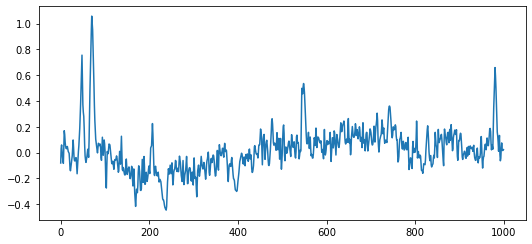

In [30]:
plt.plot(df_transformed[800:1800])
plt.show()

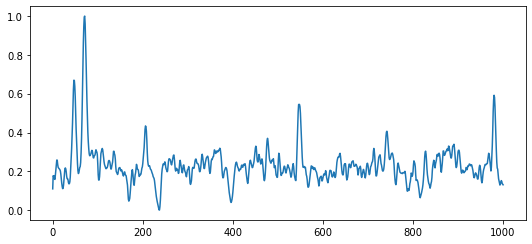

In [31]:
plt.plot(df_matlab.iloc[0])
plt.show()

In [32]:
from pybaselines.polynomial import imodpoly

In [33]:
raw_raman = df_original.iloc[0] - imodpoly(df_original.iloc[0], poly_order=150, tol=0.005, max_iter=1000, weights=None, use_original=False, mask_initial_peaks=True, return_coef=False, num_std=1)[0]
print(raw_raman)

0       2.112500
1      -6.690041
2      -5.275254
3      -1.545529
4       1.596094
          ...   
3155   -0.674594
3156   -2.001779
3157   -3.544004
3158   -3.583791
3159    1.093750
Name: 0, Length: 3160, dtype: float64


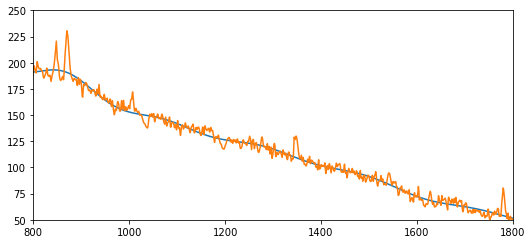

In [34]:
plt.xlim((800, 1800))
plt.ylim((50, 250))
plt.plot(imodpoly(df_original.iloc[0], poly_order=150, tol=0.005, max_iter=100, weights=None, use_original=False, mask_initial_peaks=True, return_coef=False, num_std=1)[0])
plt.plot(df_original.iloc[0].to_numpy())
plt.show()

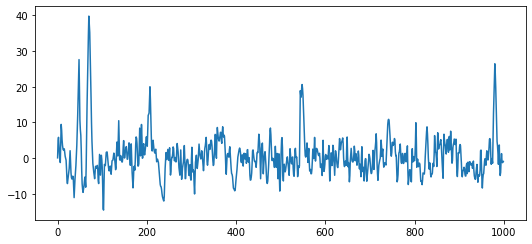

In [35]:
plt.plot(raw_raman.to_numpy()[800:1800])
plt.show()

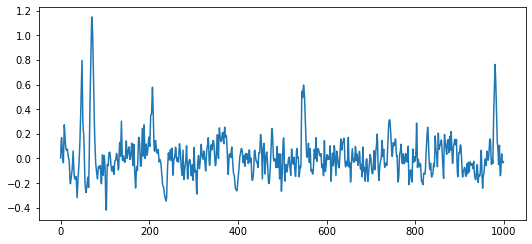

In [36]:
plt.plot(scaler.fit_transform(raw_raman.to_numpy().reshape(-1, 1))[800:1800])
plt.show()

In [37]:
X = crop_range_to_numpy(df_original)
y = df_original['has_DM2'].drop(0, inplace=False)

KeyError: "['patientID' 'has_DM2'] not found in axis"

In [38]:
X

NameError: name 'X' is not defined